In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

import torch
import torchvision.transforms as transforms
from models.densenet_ import DenseNet
from datasets.datahelpers import default_loader
from utils.converter import LabelConverter
from generate import gen_text_img

In [2]:
alphabet = ''
with open('alphabet/alphabet_decode_5990.txt', mode='r', encoding='utf-8') as f:
    for line in f.readlines():
        alphabet += line.strip()

In [3]:
num = 100
dev_num = num
use_file = 0
text = None
text_length = 1
font_size = 32
font_id = -1
space_width = 1
text_color = '#282828'
thread_count = 8
channel = 3

random_skew = True
skew_angle = 2
random_blur = True
blur = 0.5

orientation = 0
distorsion = -1
distorsion_orientation = 2
background = 1

random_process = True
noise = 20
erode = 1
dilate = 2
incline = 10


In [4]:
device = torch.device("cpu")
model_path = 'pretrained/new_params.pth'
model = DenseNet(num_classes=len(alphabet) + 1).to(device)
checkpoint = torch.load(model_path, map_location='cpu')
model.load_state_dict(checkpoint)
model.eval()

converter = LabelConverter(alphabet, ignore_case=False)

transform = transforms.Compose([
    transforms.Resize((32, 32*text_length)),
    transforms.ToTensor(),
])

性
全
第
家
定
市
等
长
美
比
外
比
好
文
市
事
还
此
其
实
用
月
成
心
日
家
就
新
者
主
家
同
家
就
同
多
者
其
后
最
开
定
通
用
自
们
心
新
成
同
实
日
定
第
其
们
面
好
实
全
日
长
法
开
外
都
市
可
就
都
分
其
子
重
外
都
得
地
主
文
然
得
多
重
市
外
美
者
好
体
司
新
好
还
可
们
重
重
机
们
pred strings: 你
pred strings: 你
pred strings: 你
pred strings: 你
pred strings: 你
pred strings: 你好
pred strings: 你
pred strings: 你
pred strings: 你好
pred strings: 你
pred strings: 你好
pred strings: 你好
pred strings: 你
pred strings: 你
pred strings: 你
pred strings: 53
pred strings: 你
pred strings: 你
pred strings: 好
pred strings: 你
pred strings: 你
pred strings: 你好
pred strings: 你
pred strings: 你
pred strings: f好
pred strings: 三
pred strings: 你
pred strings: 你好
pred strings: 你好
pred strings: 你
pred strings: 你好
pred strings: 你
pred strings: 你
pred strings: 你
pred strings: 你
pred strings: 你
pred strings: 你好
pred strings: 你
pred strings: 你好
pred strings: 你好
pred strings: 你好
pred strings: 你好
pred strings: 1好
pred strings: 你好
pred strings: 你
pred strings: 你
pred strings: 好
pred strings: 你好
pred strings: 

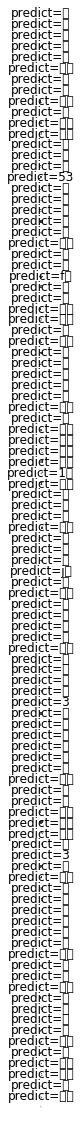

In [5]:
import numpy as np
from PIL import Image
imgs = []
figs, axs = plt.subplots(ncols = 1, nrows=num,figsize=(20,20))
plt.subplots_adjust(wspace = 0, hspace = 1.5)
df, img = gen_text_img(num, use_file, text, text_length, font_size, font_id, space_width,
                               background, text_color,
                               orientation, blur, random_blur, distorsion, distorsion_orientation,
                               skew_angle, random_skew,
                               random_process, noise, erode, dilate, incline,
                               thread_count)
base = 0
for i in range(num):
    temp = img[:,base:base+int(df.iloc[i]['img_shape']),:]
    imgs.append(Image.fromarray(temp))
    base += int(df.iloc[i]['img_shape'])
for r, (ax, img) in enumerate(zip(axs, imgs)):
    ax.axis('off')
    ax.imshow(img)
    img = img.convert("L")
    img = transform(img)
    img = np.asarray(img)
    img = torch.Tensor(img).unsqueeze(0)

    with torch.no_grad():
        log_probs = model(img)
        preds_strs = converter.best_path_decode(log_probs, strings=True).decode('utf-8')
        preds = converter.best_path_decode(log_probs, raw=True).decode('utf-8')
#         print('pred: {}'.format(preds))
        print('pred strings: {}'.format(preds_strs))
        ax.set_title(f'predict={preds_strs}')

In [6]:
df, img = gen_text_img(num, use_file, text, text_length, font_size, font_id, space_width,
                               background, text_color,
                               orientation, blur, random_blur, distorsion, distorsion_orientation,
                               skew_angle, random_skew,
                               random_process, noise, erode, dilate, incline,
                               thread_count)

全
同
然
可
实
性
主
同
好
外
关
通
天
进
场
司
进
子
本
司
者
进
外
最
后
作
本
多
多
此
多
都
面
股
等
日
机
作
文
用
三
开
可
定
好
们
然
好
事
体
进
下
还
同
场
美
性
重
此
得
后
们
面
家
进
就
性
自
最
日
日
可
者
其
开
比
本
子
进
机
分
可
者
自
其
自
家
自
体
司
们
者
都
机
后
方
地
主
当
重


In [7]:
df

,index,text,text_length,img_shape,font_size,font_id,skew_angle,blur,distorsion_type,background_type,num_noise,erode,dilate,incline
0,0,全,1,32,32,Fangsong,0.7798591079363991,0.02383920463950684,Sine wave,Plain white,20,0,1,8
1,1,同,1,29,32,FZKaiTi,-0.19369707564835503,0.2582360878937807,Cosine wave,Plain white,20,0,0,0
2,8,好,1,31,32,Fangsong,1.965392942824326,0.3793208685323255,Sine wave,Plain white,20,2,1,7
3,10,关,1,32,32,FZKaiTi,0.615134817072873,0.3447380744097598,None,Plain white,20,2,0,0
4,11,通,1,35,32,FZKaiTi,0.0,0.46600828190185617,None,Plain white,20,0,0,0
5,12,天,1,36,32,FZKaiTi,-0.11877974573920747,0.2396161728644004,None,Plain white,0,2,1,0
6,9,外,1,31,32,FZKaiTi,-1.6384640461019206,0.22492574699184514,Cosine wave,Plain white,0,0,0,0
7,14,场,1,32,32,FZKaiTi,0.3196550772502482,0.2601146409792812,Cosine wave,Plain white,20,0,0,0
8,15,司,1,37,32,HWLiShu,-0.9693592453854407,0.3553862261076443,Sine wave,Plain white,0,2,0,9
9,16,进,1,34,32,FZKaiTi,-0.19180152604883438,0.4475423156025601,Cosine wave,Plain white,20,0,1,0
